<h3>465 Homework 7</h3>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

<h3>#1.</h3>
1-hexene (H) is used as a precursor in the production of polyethylene, and it can be produced by the dehydrationreaction of hexanol (A). 

Water (W) is the second product of the reaction.

This reaction is catalyzed by amorphous silica alumina at high temperatures. 

The following experimental  data providesthe  reaction  rate  at  various initial partial pressuresof hexanolwhen the feed is pure hexanol.

𝑃A0 (atm)              0   8   30    60   106   210

−𝑟A0 (mol/hr/kg-cat)   0 0.31  0.55  0.82  0.82  0.5

In [14]:
PA0 = np.array([ 0 , 8 ,  30 ,   60 ,  106,   210]) #ATM
rA0 = np.array([0 ,0.31 , 0.55 , 0.82 , 0.82 , 0.5])  #rA0 = -rA0 and  (mol/hr/kg-cat) 

Mechanism:

𝐴+𝑆↔𝐴∙𝑆

𝐴∙𝑆+𝑆↔𝐻∙𝑆+𝑊∙𝑆

𝐻∙𝑆↔𝐻+𝑆

𝑊∙𝑆↔𝑊+𝑆

<h3>A. You  know  that  the  rate  limiting step  is  the  surface  reaction. Given  this  information, determine a form of the rate law of disappearance of hexanol (A).

Rate limiting Step  = 𝐴∙𝑆+𝑆↔𝐻∙𝑆+𝑊∙𝑆

r_AA = k_A * P_A * C_S - k_-A * C_A*S 
    = k_A (P_A * C_S - C_A*S / K_AA)
    
       where Cs = Cv (vacant sites)
    
r_S = k_S C_A*S * C_S - k_-S * C_H*S  *  C_W*S
   = k_S (C_A*S * C_S - C_H*S * C_W*S / K_S )
   
      = approximately 0

r_DH = k_DH * C_H*s - k_-DH * P_H * C_S
    = k_DH(C_H*S - P_H * C_S / K_DH)
    
    = approximately 0

C_A*S = K_AA * P_A * C_S

C_H*S = P_H * C_S / K_DH

C_W*S = P_W * C_S / K_DW

r_S = k_S (C_A*S * C_S - C_H*S * C_W*S / K_S )

 = k_S ((K_AA * P_A * C_S^2) - (P_H * C_S / K_DH) * (P_W * C_S / K_DW) / K_S )
 
 = k_S ((K_AA * P_A * C_S^2) - (P_H * P_C * C_S^2/ (K_DH * K_DW * K_S))
 
  = k_S*C_S^2((K_AA * P_A) - (P_H * P_C / (K_DH * K_DW * K_S))

 
 C_T = C_S + C_A*S + C_H*S + C_W*S
 
     = C_S + K_AA*P_A*C_S + P_H*C_S / K_DH + P_C*C_S / K_DW
     
     = C_S ( 1 + (K_AA*P_A) + (P_H*/K_DH) + (P_W/K_DW))

C_S = C_T / ( 1 + (K_AA*P_A) + (P_H*/K_DH) + (P_W/K_DW))

r_S = k_S*C_T^2((K_AA * P_A) - (P_H * P_C / (K_DH * K_DW * K_S))  /  ( 1 + (K_AA*P_A) + (P_H*/K_DH) + (P_C/K_DC))^2


-r_A = r_S = k_S*C_T^2*K_AA(P_A-(P_H * P_C / (K_AA* K_DH * K_DW * K_S)) /  ( 1 + (K_AA*P_A) + (P_H*/K_DH) + (P_C/K_DC))^2

P_H0 = 0

P_W0 = 0

-r_A0 = k_S *C_T^2 *K_AA *P_A0  /  ( 1 + (K_AA*P_A0))^2

   


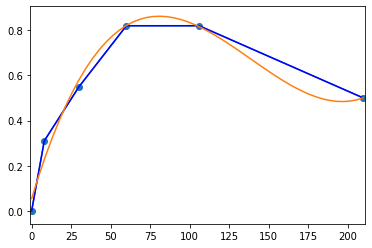

In [43]:
plt.scatter(PA0,rA0)
plt.plot(PA0,rA0)
np.polyfit(PA0,rA0,1)

points = np.array([(0,0), (8,.31), (30,.55), (60,.82), (106,.82), (210,.5)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'b', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

<h3>B. What are the values of the parameters KAA and k1

(where KAA=kAA/kDA and k1=ksCT^2) in the rate law of disappearance of hexanol?

In [44]:
from scipy.optimize import curve_fit

In [45]:
PA0 = np.array([ 0 , 8 ,  30 ,   60 ,  106,   210]) #ATM
_rA0 = np.array([0 ,0.31 , 0.55 , 0.82 , 0.82 , 0.5])

In [49]:
def rate_law(P, k1, KAA):
    return k1 * KAA * P / ((1 + KAA*P)**2)

In [50]:
popt, pcov = curve_fit(rate_law, PA0, _rA0)

In [51]:
k1, KAA = popt
print("k1 = {:.3e}, KAA = {:.3e}".format(k1, KAA))

k1 = 3.084e+00, KAA = 1.395e-02


<h3>C. Given the data above, at the partial pressure associated with the largest reaction rate of disappearance of A, 
    

what fraction of surface sites are vacant? 
    
What fraction are occupied by A and H?

C_S / C_T = 1/( 1 + (K_AA*P_A) + (P_H*/K_DH) + (P_W/K_DW))

Initially last two terms will be zero

C_S / C_T = 1/( 1 + (K_AA*P_A)) 

= 1 + (-.01395)*60 = 0.163

Initally the occupied A, and H sites will be = 0 

<h3>#3.</h3>

You  were  lucky  enough  to  be  selected  for  a  Summer  REU  position  at  Hogwarts  School  of Witchcraft  and  Wizardry  in  the  Potion  Engineering  Department.  Upon  arrival,  you immediately are pulled aside by one of the CauldronDesign TAs, Ron Weasley. He is freaking out because he has no idea what he’s doing. He begs for your help in sizing non-isothermal, adiabatic cauldrons(similar to the reactors that muggles use). He says that theliquid-phase, reversible reaction has the chemical equation

𝐴+𝐵↔2𝐶

and follows an elementary rate law. The class instructor, Prof. Snape, said the reactor should have  an  

inlet  flow  rate  of  100m^3/hr  

and equimolar concentrations  of  A  and  B equal  to 8mol/L

or else there will be “consequences,” whatever that means.You also know the following information:


CPA= 140 cal/(mol K)

kf(30 °C) = 1.8 L/(mol hr)

Ea= 25.3 kcal/molCP

B= 100 cal/(mol K)

KC(30 °C) = 25.0

Tinlet= 20 °C

CPC= 120 cal/(mol K)

Hrxn°(30 °C) = -9.6 kcal/mol

X0 =          0.1   0.2   0.3   0.4   0.5   0.6

FA0/-rA m^3  = ?     ?     ?     ?     ?      ? 


In [7]:
CPA= 140 #cal/(mol K)
kf = 1.8 #L/(mol hr) @ 303.15 K (30 °C)
Ea= 25.3 #kcal/mol
CPB= 100 #cal/(mol K)
KC= 25.0  # @ 303.15 K(30 °C) 
Tinlet= 293.15 #  =  20°C
CPC= 120 #cal/(mol K)
Hrxn = -9.6 #kcal/mol  @ 303.15 K (30 °C)
Finlet = 100 # m^3/hr
Aeq = 8 #mol/L
Beq = 8 #mol/L
X0 =np.array([0.1 ,  0.2 ,  0.3  , 0.4 ,  0.5 ,  0.6])



<h3> A.Calculate and  tabulate FA0/-rA values for the  conversions  in  the  table  above  and generate a Levenspielplot.</h3>

Be sure to label axes appropriately. (Note: deriving each relationship and then using Python to calculate all values at once probably makes life easier)

T = T0 + (-DeltaH_rx)*X / CPA

B.Assuming the data generated in part (a) sufficiently approximates the Levenspiel plot and that a continuously stirred tank cauldron will be used first, followed by a plug-flow cauldron,  

<h3>what  are  the  volumes  of  each cauldron such  that  the  total  volume  is minimized?

C.Ron was originally going to assume a single plug-flow cauldronwould give the smallest volume.  

<h3> How  much  bigger  would  a  single plug-flow  cauldron be compared  to  the volume of cauldrons in series from your answer in part (b)?

<h3>#4.</h3>
The elementary liquid-phase reactions A B C take place in a non-isothermal 100-L CSTR with heat effects. The volumetric feed rate is 1000 L/min at a concentration of A of 0.3 mol/Lwith an inlet temperature of 20 °C.

Additional Information

CPA= 200 J/mol•K

CPB= 200 J/mol•K

CPC= 200 J/mol•K

k1= 1.3 min-1  at 300 K with E1= 11.9 kcal/mol

k2= 3.5 min-1at 500 K, with E2= 23.0 kcal/mol

HRx1A= -38.0 kJ/mol A

HRx1B= -65.0kJ/mol B

BUA = 30.0 kJ/mol•K 

with Ta= 57 °C

In [9]:
#Additional Information

CSTR = 100 #L with heat effects

Vfeed = 1000 #L/min
# At a Concentration of A of 

CA = 0.3 #mol/L
#With an Inlet Temperature of 

Tinlet = 293.15 # K which will = 20  Degrees C

CPA= 200 #J/mol•K

CPB= 200 #J/mol•K

CPC= 200 #J/mol•K

k1= 1.3 #min-1  at 

T1 = 300 #K 

E1= 11.9 #kcal/mol

k2= 3.5 #min-1 at 

T2 = 500 #K 

E2= 23.0 #kcal/mol

HRx1A= -38.0 #kJ/mol A

HRx1B= -65.0 #kJ/mol B

BUA = 30.0 #kJ/mol•K 

Ta= 330.15 # K = 57 °C

<h3> A. At  what  temperatures  are  the  different  steady  states  and what  are  the  effluent concentrations for each speciesat each steady state?</h3>

Be sure to include your plot of G(T),  R(T)  vs  T  with  properly  labeled  axesand  a  legend.  (Note:  you  do  not  need polymath to plot G(T) and R(T) vs T, Python can be used to plot them)

<h3>B. By  comparing  the  selectivitiesof  B/C,  which  steady  state  would  you  choose  if  you wanted to maximize formation of B?</h3>